In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-predictions/st.ipynb
/kaggle/input/student-performance-predictions/student_performance.csv
/kaggle/input/student-performance-predictions/best_student_performance_model.pkl


In [2]:
# import libraries and models

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
student = pd.read_csv(r"/kaggle/input/student-performance-predictions/student_performance.csv",index_col='StudentID')
student

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
StudentID,,,,,,,,
1,John,Male,85,15,78,1,High,80
2,Sarah,Female,90,20,85,2,Medium,87
3,Alex,Male,78,10,65,0,Low,68
4,Michael,Male,92,25,90,3,High,92
5,Emma,Female,88,18,82,2,Medium,85
6,Olivia,Female,95,30,88,1,High,90
7,Daniel,Male,70,8,60,0,Low,62
8,Sophia,Female,85,17,77,1,Medium,78
9,James,Male,82,12,70,2,Low,72


In [4]:
student.shape


(10, 8)

In [5]:
df = student.copy()


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       10 non-null     object
 1   Gender                     10 non-null     object
 2   AttendanceRate             10 non-null     int64 
 3   StudyHoursPerWeek          10 non-null     int64 
 4   PreviousGrade              10 non-null     int64 
 5   ExtracurricularActivities  10 non-null     int64 
 6   ParentalSupport            10 non-null     object
 7   FinalGrade                 10 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 720.0+ bytes


In [7]:
df.columns


Index(['Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [8]:
df.isna().sum()


Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

In [9]:
df.duplicated().sum()


0

In [10]:
df.describe()


,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,85.600000,17.700000,78.100000,1.500000,80.200000
std,7.441625,6.848357,10.170218,1.080123,10.097304
min,70.000000,8.000000,60.000000,0.000000,62.000000
25%,82.750000,12.750000,71.750000,1.000000,73.500000
50%,86.500000,17.500000,80.000000,1.500000,82.500000
75%,90.750000,21.500000,85.750000,2.000000,87.750000
max,95.000000,30.000000,90.000000,3.000000,92.000000


In [11]:
df['Gender'].value_counts(normalize=True).reset_index()


,Gender,proportion
0,Male,0.5
1,Female,0.5


In [12]:
# averages by gender
gender_grp = df.groupby('Gender')

gender_grp[['AttendanceRate', 'StudyHoursPerWeek','PreviousGrade', 'ExtracurricularActivities', 'FinalGrade']].mean()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade
Gender,,,,,
Female,89.8,21.4,83.6,1.8,85.6
Male,81.4,14.0,72.6,1.2,74.8


In [13]:
unpivot = gender_grp['ParentalSupport'].value_counts(normalize=True).reset_index()
unpivot

,Gender,ParentalSupport,proportion
0,Female,Medium,0.6
1,Female,High,0.4
2,Male,Low,0.6
3,Male,High,0.4


In [14]:
# parental support by gender
pivot = unpivot.pivot_table(index='ParentalSupport', columns='Gender', values='proportion', fill_value=0)
pivot

Gender,Female,Male
ParentalSupport,,
High,0.4,0.4
Low,0.0,0.6
Medium,0.6,0.0


In [16]:
students_corr =df[['AttendanceRate', 'StudyHoursPerWeek','PreviousGrade', 'ExtracurricularActivities']].corr()
students_corr

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities
AttendanceRate,1.000000,0.934885,0.973946,0.691172
StudyHoursPerWeek,0.934885,1.000000,0.930535,0.563286
PreviousGrade,0.973946,0.930535,1.000000,0.743432
ExtracurricularActivities,0.691172,0.563286,0.743432,1.000000


<Axes: >

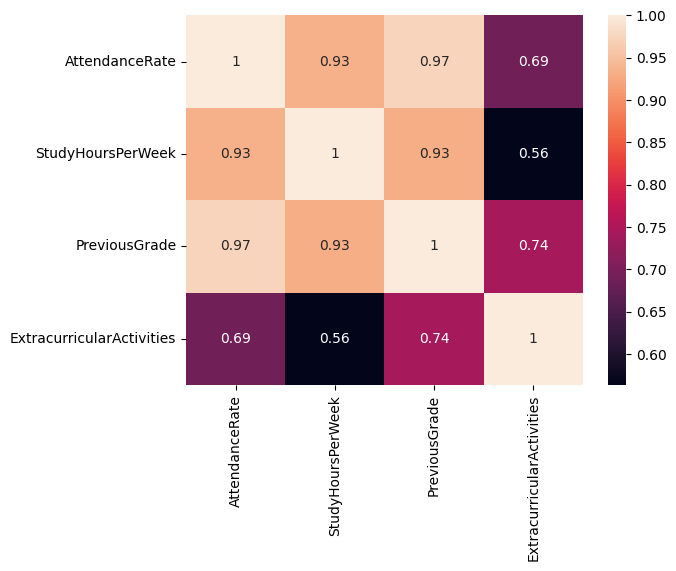

In [17]:
sns.heatmap(students_corr, annot=True)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

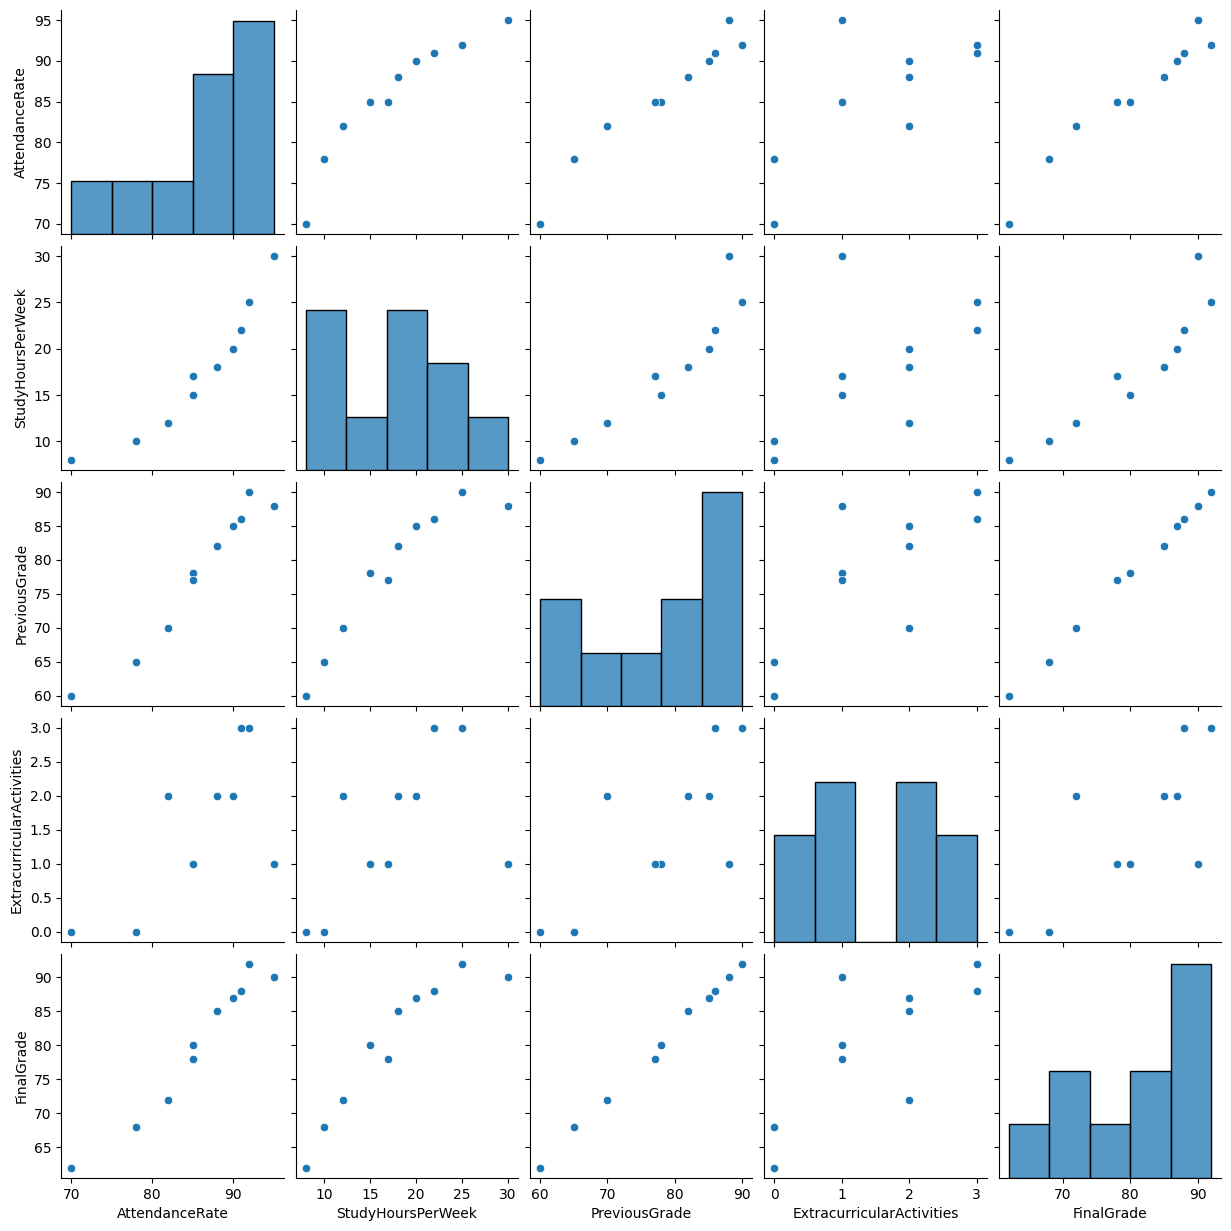

In [18]:
sns.pairplot(df)


In [19]:
# identify independent and dependent variables
train = df[['AttendanceRate', 'StudyHoursPerWeek','PreviousGrade', 'ExtracurricularActivities']]
test = df['FinalGrade']

x_train, x_text, y_train,y_test = train_test_split(train,test,test_size=0.3,random_state=42)

regr = LinearRegression()

regr.fit(x_train,y_train)

pred = regr.predict(x_text)
pred

array([74.48246852, 87.01336271, 86.02582661])

In [20]:
regr.score(x_text,y_test)


0.8819522436770133